In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

In [2]:
# import file_path and make dataframe

commodity_file_path = Path('./data/psd_coffee.csv')
commodity_df = pd.read_csv(commodity_file_path, index_col=0)
commodity_df.head()

,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
Commodity_Code,,,,,,,,,,,
711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0


In [3]:
# print dataframe columns

commodity_df.columns

Index(['Commodity_Description', 'Country_Code', 'Country_Name', 'Market_Year',
       'Calendar_Year', 'Month', 'Attribute_ID', 'Attribute_Description',
       'Unit_ID', 'Unit_Description', 'Value'],
      dtype='object')

In [4]:
# Check for blanks 
commodity_df.isna().sum()

Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64

In [5]:
#  Check for duplicates
commodity_df.duplicated().sum()

0

In [6]:
# Drop NaNs and check isna() again
commodity_df.dropna()
commodity_df.isna().sum()

Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64

In [7]:
# get row count and datatype info on community df
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77957 entries, 711100 to 711100
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  77957 non-null  object 
 1   Country_Code           77957 non-null  object 
 2   Country_Name           77957 non-null  object 
 3   Market_Year            77957 non-null  int64  
 4   Calendar_Year          77957 non-null  int64  
 5   Month                  77957 non-null  int64  
 6   Attribute_ID           77957 non-null  int64  
 7   Attribute_Description  77957 non-null  object 
 8   Unit_ID                77957 non-null  int64  
 9   Unit_Description       77957 non-null  object 
 10  Value                  77957 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 7.1+ MB


In [8]:
# Note the 'Value' column has many Zeros, check to see the number of zeros in this column
value_zero = commodity_df['Value'] == 0
value_nonzero = commodity_df['Value'] > 0

count_zero = len(commodity_df.loc[value_zero])
count_nonzero = len(commodity_df.loc[value_nonzero])

print(f'Count of zero Values: {count_zero}')
print(f'Count of non-zero Values: {count_nonzero}')

Count of zero Values: 36431
Count of non-zero Values: 41526


In [9]:
# consolidate commodity_df into only non_zeros for 'Value' column
nonzero_df = commodity_df.loc[value_nonzero]
nonzero_df.head()

,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
Commodity_Code,,,,,,,,,,,
711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,57,Imports,2,(1000 60 KG BAGS),1805.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,141,"Rst,Ground Dom. Consum",2,(1000 60 KG BAGS),1800.0
711100,"Coffee, Green",AG,Algeria,2003,2012,6,154,Soluble Dom. Cons.,2,(1000 60 KG BAGS),5.0


In [10]:
nonzero_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41526 entries, 711100 to 711100
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  41526 non-null  object 
 1   Country_Code           41526 non-null  object 
 2   Country_Name           41526 non-null  object 
 3   Market_Year            41526 non-null  int64  
 4   Calendar_Year          41526 non-null  int64  
 5   Month                  41526 non-null  int64  
 6   Attribute_ID           41526 non-null  int64  
 7   Attribute_Description  41526 non-null  object 
 8   Unit_ID                41526 non-null  int64  
 9   Unit_Description       41526 non-null  object 
 10  Value                  41526 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 3.8+ MB


In [11]:
# define get_unique_values_df function to make a dataframe of each column and its unique values
def get_unique_values_df(df):

    # initialize unique_dict and unique_values_list
    unique_values_list = []

    # copy dataframe
    df = df.copy()

    # iterate through columns
    for column in df.columns:
        # extract unique values
        unique_values = df[column].unique()
        # append unique values from each column to unique_values_list
        unique_values_list.append(unique_values)

    # make a dataframe of column name and unique values 
    values_df = pd.DataFrame({'Column Name':[col for col in df.columns], 'Unique_Values': unique_values_list, 'Unique_Count': [len(item) for item in unique_values_list]}) 

    # return dataframe
    return values_df

In [12]:
unique_values_df = get_unique_values_df(nonzero_df)
unique_values_df.head(10)

,Column Name,Unique_Values,Unique_Count
0,Commodity_Description,"[Coffee, Green]",1
1,Country_Code,"[AG, AO, AR, AS, DM, BL, BR, BY, CM, CA, CT, C...",84
2,Country_Name,"[Algeria, Angola, Argentina, Australia, Benin,...",84
3,Market_Year,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",64
4,Calendar_Year,"[2012, 2015, 2014, 2016, 2017, 2018, 2020, 202...",62
5,Month,"[6, 12, 0]",3
6,Attribute_ID,"[58, 125, 57, 141, 154, 82, 178, 86, 29, 90, 2...",19
7,Attribute_Description,"[Bean Imports, Domestic Consumption, Imports, ...",19
8,Unit_ID,[2],1
9,Unit_Description,[(1000 60 KG BAGS)],1


In [13]:
# define function to get unique values from input column
def get_unique_values(member):
    # extract unique values from input column
    unique_values = list(member.unique())
    # print the number of unique values
    print(len(unique_values))
    # print unique values
    print(unique_values)

    #return unique values
    return unique_values


In [14]:
country_unique = get_unique_values(nonzero_df['Country_Name'])


84
['Algeria', 'Angola', 'Argentina', 'Australia', 'Benin', 'Bolivia', 'Brazil', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'European Union', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Laos', 'Liberia', 'Madagascar', 'Malawi', 'Malaysia', 'Mexico', 'Morocco', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Russia', 'Rwanda', 'Saudi Arabia', 'Serbia', 'Sierra Leone', 'Singapore', 'South Africa', 'Sri Lanka', 'Switzerland', 'Taiwan', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Venezuela

In [15]:
month_unqie = get_unique_values(nonzero_df['Month'])


3
[6, 12, 0]


In [16]:
attribute_description_unique = get_unique_values(nonzero_df['Attribute_Description'])

19
['Bean Imports', 'Domestic Consumption', 'Imports', 'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Imports', 'Total Distribution', 'Total Supply', 'Arabica Production', 'Bean Exports', 'Beginning Stocks', 'Ending Stocks', 'Exports', 'Production', 'Robusta Production', 'Roast & Ground Imports', 'Roast & Ground Exports', 'Soluble Exports', 'Other Production']


In [17]:
market_year_unique = get_unique_values(nonzero_df['Market_Year'])

64
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 1960]


In [18]:
calendar_year_unique = get_unique_values(nonzero_df['Calendar_Year'])

62
[2012, 2015, 2014, 2016, 2017, 2018, 2020, 2021, 2022, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2010, 2011, 2019, 2006, 2013, 2007, 2008, 2009, 1959]


In [19]:
country_labels = country_unique
country_values = nonzero_df['Value'].groupby(nonzero_df['Country_Name']).sum()


<AxesSubplot: ylabel='Country_Name'>

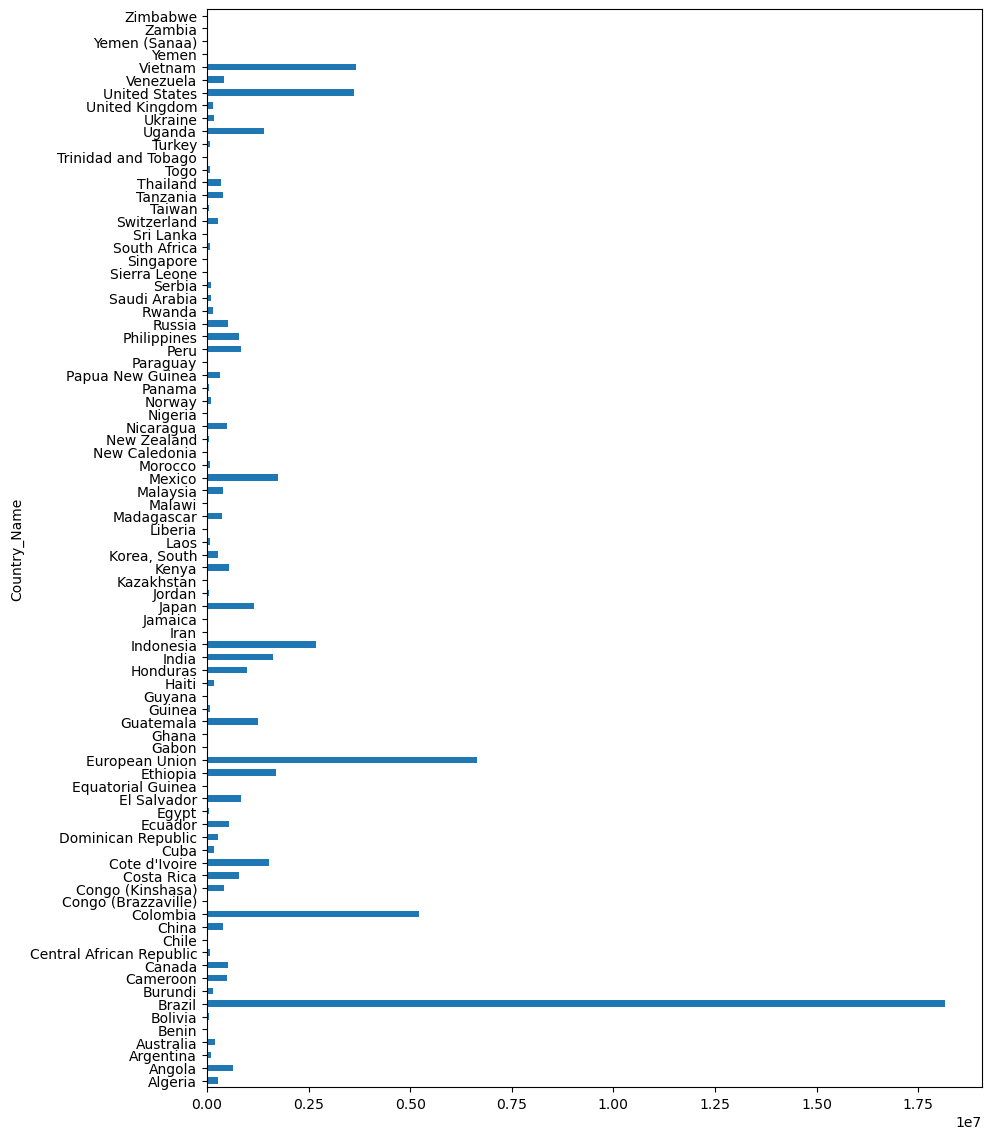

In [20]:
plt.subplots(figsize=(10,14))
country_values.plot.barh('Country_Name','Value')

In [45]:
attribute_values_country = nonzero_df.groupby(['Attribute_Description','Country_Name'])['Value'].sum().unstack()
attribute_values_country

Country_Name,Algeria,Angola,Argentina,Australia,Benin,Bolivia,Brazil,Burundi,Cameroon,Canada,...,Uganda,Ukraine,United Kingdom,United States,Venezuela,Vietnam,Yemen,Yemen (Sanaa),Zambia,Zimbabwe
Attribute_Description,,,,,,,,,,,,,,,,,,,,,
Arabica Production,NaN,1310.0,NaN,NaN,NaN,7257.0,1764750.0,21403.0,12677.0,NaN,...,26928.0,NaN,NaN,11592.0,55668.0,16706.0,3301.0,1911.0,1233.0,4228.0
Bean Exports,NaN,53674.0,NaN,NaN,836.0,4554.0,1275801.0,21797.0,63932.0,NaN,...,198598.0,NaN,NaN,473.0,11324.0,512143.0,935.0,1584.0,1162.0,3949.0
Bean Imports,43325.0,NaN,10149.0,25160.0,NaN,NaN,16.0,NaN,80.0,50725.0,...,NaN,4350.0,19050.0,488215.0,6463.0,5486.0,NaN,NaN,NaN,NaN
Beginning Stocks,NaN,78552.0,NaN,NaN,44.0,3795.0,1293742.0,6959.0,22049.0,NaN,...,45905.0,NaN,NaN,123363.0,13853.0,41103.0,NaN,NaN,12.0,1207.0
Domestic Consumption,43940.0,2950.0,15604.0,33105.0,33.0,2708.0,788931.0,179.0,3232.0,86935.0,...,5165.0,28045.0,26090.0,509288.0,50619.0,43332.0,2276.0,310.0,181.0,334.0
Ending Stocks,NaN,77735.0,NaN,NaN,44.0,3790.0,1244342.0,6959.0,22032.0,NaN,...,45702.0,NaN,NaN,129463.0,13660.0,44158.0,NaN,NaN,12.0,1206.0
Exports,NaN,53674.0,NaN,NaN,836.0,4554.0,1415966.0,21797.0,64254.0,NaN,...,198598.0,NaN,NaN,5781.0,12016.0,539885.0,1025.0,1601.0,1162.0,3949.0
Imports,43940.0,NaN,15604.0,33105.0,NaN,NaN,647.0,NaN,168.0,86935.0,...,NaN,28045.0,26090.0,509577.0,6774.0,9738.0,NaN,NaN,110.0,54.0
Other Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,294.0,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

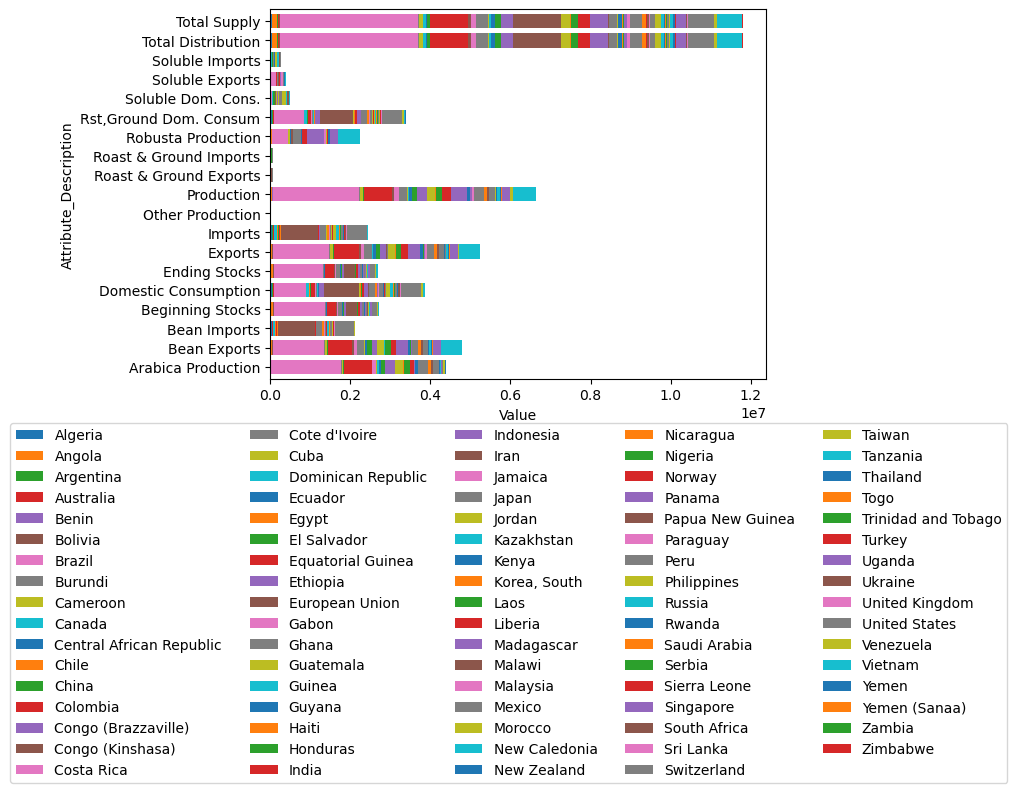

In [62]:
attribute_values_country.plot.barh(stacked=True,width=0.75)
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(1.5,-0.1), ncols=5)
plt.show
